<a href="https://colab.research.google.com/github/rouaLagha/TP3_Machine_Learning/blob/main/Exercice3TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
df = pd.read_csv('/content/combined_data.csv')

In [4]:
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   7485 non-null   int64 
 1   text    7485 non-null   object
dtypes: int64(1), object(1)
memory usage: 117.1+ KB


,0
label,0
text,0


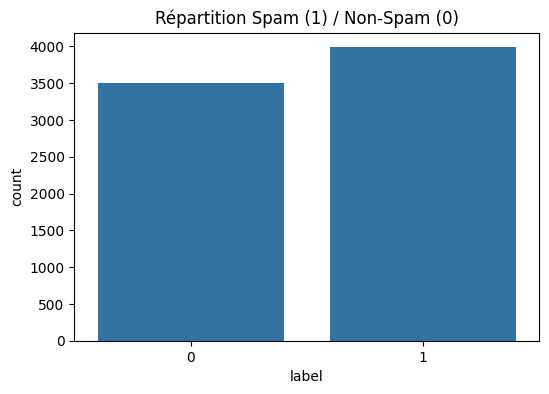

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title("Répartition Spam (1) / Non-Spam (0)")
plt.show()

In [12]:
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):

    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
df['clean_text'] = df['text'].apply(clean_text)

In [17]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [22]:
y_pred = model.predict(X_test)

In [25]:
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")

Accuracy : 0.9499


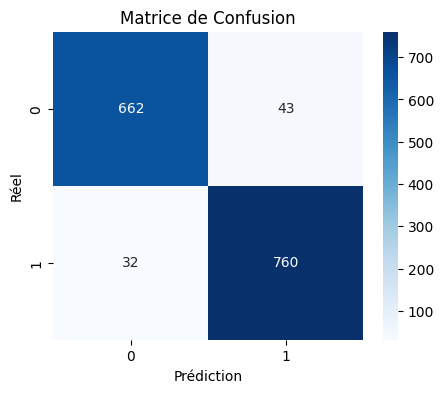

In [26]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()

In [27]:
feature_names = vectorizer.get_feature_names_out()
word_probs = model.feature_log_prob_
spam_word_indices = np.argsort(word_probs[1])[::-1]
spam_words = [(feature_names[i], word_probs[1][i]) for i in spam_word_indices[:20]]

print("\n🔍 Mots les plus associés au SPAM :")
for word, prob in spam_words:
    print(f"{word}: {prob:.4f}")


🔍 Mots les plus associés au SPAM :
escapenumber: -3.7593
escapelong: -4.9272
com: -5.2060
http: -5.2782
price: -5.3566
product: -5.7043
day: -5.8527
one: -5.8557
quality: -5.9167
get: -5.9577
offer: -5.9616
www: -5.9654
watch: -5.9746
drug: -5.9756
save: -5.9788
email: -5.9869
see: -5.9891
pill: -6.0050
low: -6.0223
online: -6.0261
